In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [78]:
rw_new = pd.read_csv('C:/Users/raclo/Documents/Bootcamp/Project 2/Sprint 4/winequality-red.csv', sep=";")

In [79]:
rw_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [80]:
rw_new.shape

(1599, 12)

In [81]:
# Identify duplicate rows
duplicate_rows = rw_new.duplicated()

# Drop the duplicates
rw_new.drop_duplicates(inplace=True)

# Count the duplicates
duplicate_rows.value_counts()

False    1359
True      240
Name: count, dtype: int64

In [82]:
rw_new.shape

(1359, 12)

In [83]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
rw_new['quality_label'] = rw_new['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')
inplace=True

# here we are transforming these labels into a categorical data type (specific to pandas) instead of a simple string
rw_new['quality_label'] = pd.Categorical(rw_new['quality_label'],
categories=['low', 'medium', 'high'])
inplace=True

In [84]:
rw_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,low


In [85]:
print(rw_new.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label'],
      dtype='object')


In [86]:
rw_new.drop(columns=["quality"], inplace=True)

In [87]:
rw_new.drop(columns=["residual sugar"], inplace=True)

In [88]:
# rw_new.drop(columns=["density"], inplace=True)

In [89]:
# rw_new.drop(columns=["free sulfur dioxide"], inplace=True)

In [90]:
print(rw_new.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality_label'],
      dtype='object')


In [91]:
rw_new[['quality_label']].tail()

,quality_label
1593,medium
1594,low
1595,medium
1597,low
1598,medium


In [92]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

oe = OrdinalEncoder(categories=[["low", "medium", "high"]], dtype=int) # this is how you can define the label order
rw_new['quality_label'] = oe.fit_transform(rw_new[['quality_label']])

rw_new[['quality_label']].head()

,quality_label
0,0
1,0
2,0
3,1
5,0


In [93]:
# split data
from sklearn.model_selection import train_test_split

X = rw_new.drop('quality_label', axis=1)
y = rw_new['quality_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [94]:
# # normalize data
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [95]:
# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

In [96]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# define model
LR_model = LogisticRegression(max_iter=15000)
# fit model
LR_model.fit(X_train_norm, y_train)
# make predictions
LR_preds = LR_model.predict(X_test_norm)

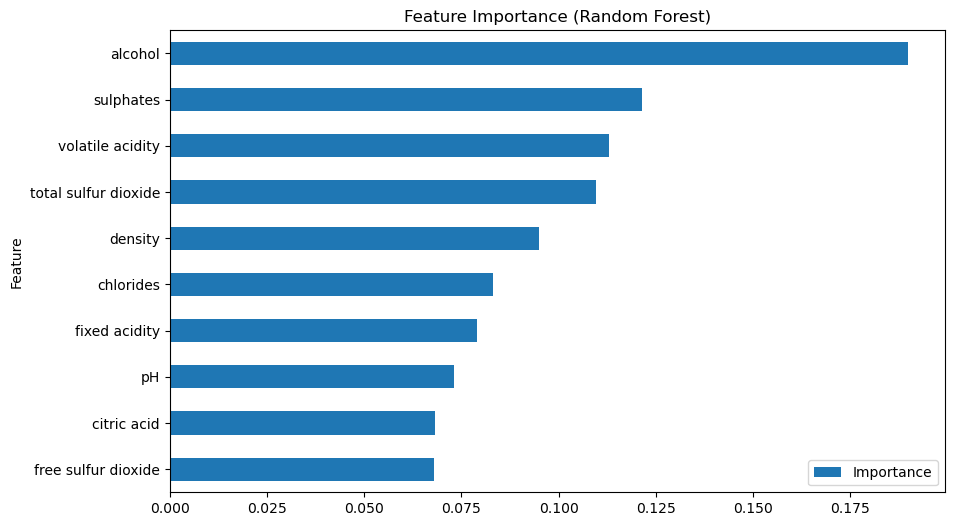

In [97]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

# Plotting with a title
ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
ax.set_title('Feature Importance (Random Forest)')
plt.show()


In [98]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# define model
RF_clf = RandomForestClassifier(random_state=42)
# fit model
RF_clf.fit(X_train_norm, y_train)
# make predictions
RF_preds = RF_clf.predict(X_test_norm)

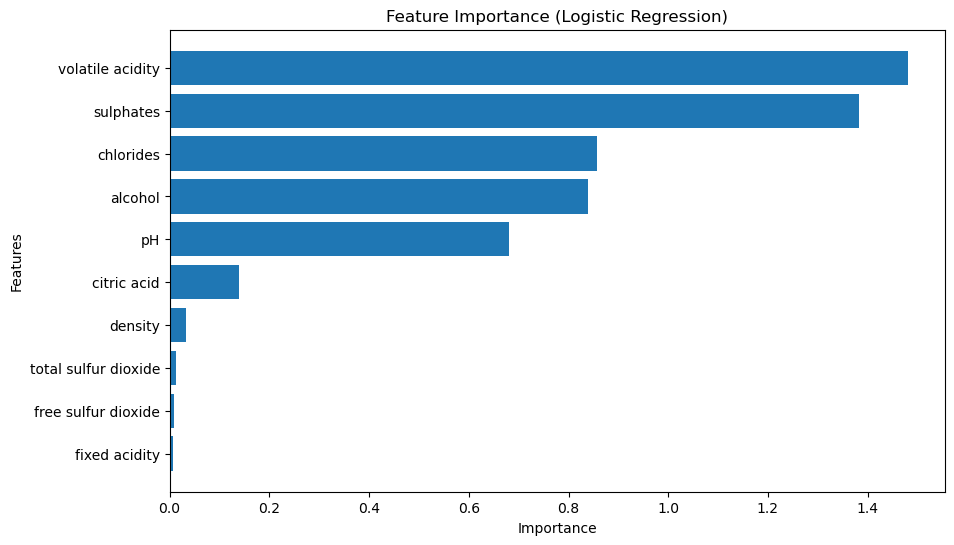

In [99]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Train a Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=15000).fit(X_train, y_train)

# Get feature coefficients and their absolute values
coefficients = lr.coef_[0]  # For binary classification, lr.coef_ has shape (1, n_features)
importance = np.abs(coefficients)
indices = np.argsort(importance)[::-1]  # Sort features by importance

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), importance[indices], align='center')
plt.yticks(range(X_train.shape[1]), X.columns[indices])  # Features on the y-axis
plt.gca().invert_yaxis()  # Optional: Most important feature at the top
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [100]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
# define model
BER_clf = BernoulliNB()
# fit model
BER_clf.fit(X_train_norm, y_train)
# make predictions
BER_preds = BER_clf.predict(X_test_norm)

In [101]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# define model
DTC_clf = DecisionTreeClassifier(random_state=42)
# fit model
DTC_clf.fit(X_train_norm, y_train)
# make predictions
DTC_preds = DTC_clf.predict(X_test_norm)

In [102]:
# Support Vector Classifier
from sklearn.svm import SVC
# define model
SVC_clf = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
# fit model
SVC_clf.fit(X_train_norm, y_train)
# make predictions
SVC_preds = SVC_clf.predict(X_test_norm)

In [103]:
from sklearn.metrics import accuracy_score 

# check overall accuracy %
LR_acc = accuracy_score(y_test, LR_preds)
RF_acc = accuracy_score(y_test, RF_preds)
BER_acc = accuracy_score(y_test, BER_preds)
DTC_acc = accuracy_score(y_test, DTC_preds)
SVC_acc = accuracy_score(y_test, SVC_preds)

print("Logistic Regression: ", LR_acc, "\nRandom Forest: ", RF_acc, "\nBernoulliNB: ", 
    BER_acc, "\nDecisionTreeClassifier :",DTC_acc, "\nSupport Vector Classifier: ",SVC_acc)

Logistic Regression:  0.7610294117647058 
Random Forest:  0.7720588235294118 
BernoulliNB:  0.5073529411764706 
DecisionTreeClassifier : 0.6433823529411765 
Support Vector Classifier:  0.7720588235294118


## Test Overfitting

In [109]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [110]:

model = RandomForestClassifier()
model.fit(X_train_norm, y_train)
print('Training Accuracy : ', 
      metrics.accuracy_score(y_train,
                             model.predict(X_train_norm))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(y_test, 
                             model.predict(X_test_norm))*100)

Training Accuracy :  100.0
Validation Accuracy :  77.57352941176471


In [111]:
model = LogisticRegression()
model.fit(X_train_norm, y_train)
print('Training Accuracy : ', 
      metrics.accuracy_score(y_train,
                             model.predict(X_train_norm))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(y_test, 
                             model.predict(X_test_norm))*100)

Training Accuracy :  71.8491260349586
Validation Accuracy :  76.10294117647058


In [112]:
model = BernoulliNB()
model.fit(X_train_norm, y_train)
print('Training Accuracy : ', 
      metrics.accuracy_score(y_train,
                             model.predict(X_train_norm))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(y_test, 
                             model.predict(X_test_norm))*100)

Training Accuracy :  53.081876724931
Validation Accuracy :  50.73529411764706


In [113]:
model = DecisionTreeClassifier()
model.fit(X_train_norm, y_train)
print('Training Accuracy : ', 
      metrics.accuracy_score(y_train,
                             model.predict(X_train_norm))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(y_test, 
                             model.predict(X_test_norm))*100)

Training Accuracy :  100.0
Validation Accuracy :  62.86764705882353


In [114]:
model = SVC()
model.fit(X_train_norm, y_train)
print('Training Accuracy : ', 
      metrics.accuracy_score(y_train,
                             model.predict(X_train_norm))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(y_test, 
                             model.predict(X_test_norm))*100)

Training Accuracy :  75.43698252069917
Validation Accuracy :  77.20588235294117


## SMOTE other test

In [104]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [105]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_norm, y_train)

# Define and train the Random Forest model
RF_clf = RandomForestClassifier(random_state=42)
RF_clf.fit(X_train_smote, y_train_smote)

# Make predictions
RF_preds = RF_clf.predict(X_test_norm)


In [106]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, RF_preds)
print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 0.78


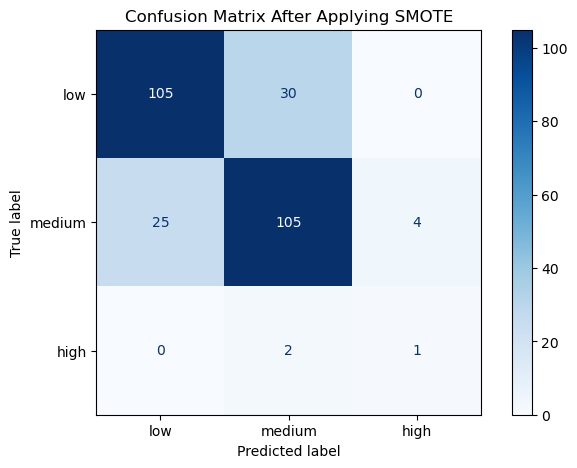

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, RF_preds)

# Set custom figure size
plt.figure(figsize=(8, 5))

# Display the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['low', 'medium', 'high'])
disp.plot(cmap="Blues", ax=plt.gca())  # Use plt.gca() to plot on the same figure

# Updated title with best capitalization
plt.title("Confusion Matrix After Applying SMOTE")
plt.show()




## SMOTE

In [69]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split

In [70]:
# X = rw_new.drop('quality_label', axis=1)
# y = rw_new['quality_label']

In [71]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [72]:
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [73]:
# from collections import Counter

# print("Original class distribution:", Counter(y_train))
# print("SMOTE class distribution:", Counter(y_train_smote))

In [74]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Train a Random Forest classifier
# clf = RandomForestClassifier(random_state=42)
# clf.fit(X_train_smote, y_train_smote)

# # Predict on test data
# y_pred = clf.predict(X_test)

# # Generate and print the classification report
# report = classification_report(y_test, y_pred)
# print("Classification Report:\n", report)

# # Generate confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Plot confusion matrix
# plt.figure(figsize=(4, 3))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
# plt.title('Confusion Matrix - Random Forest')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

In [75]:
# # Train a Logistic Regression classifier
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(max_iter=10000)
# clf.fit(X_train_smote, y_train_smote)

# # Predict on test data
# y_pred = clf.predict(X_test)

# # Generate and print the classification report
# report = classification_report(y_test, y_pred)
# print("Classification Report:\n", report)

# # Generate confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Plot confusion matrix
# plt.figure(figsize=(4, 3))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
# plt.title('Confusion Matrix - Logistic Regression')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

## Randomized Search

In [82]:

n_estimators = np.arange(10,201,10)
max_depth = np.arange(5, 55, 5)
min_samples_split = np.arange(2, 15, 2)
max_features = ["sqrt", "log2", None]

param_grid = {
'n_estimators': n_estimators,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'max_features': max_features,
}

param_grid

{'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140, 150, 160, 170, 180, 190, 200]),
 'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
 'max_features': ['sqrt', 'log2', None]}

In [83]:
from sklearn.model_selection import RandomizedSearchCV

# redefine model
RF_clf = RandomForestClassifier(random_state=42)

RS_grid = RandomizedSearchCV(estimator=RF_clf, param_distributions=param_grid, n_iter=10)
RS_grid

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [84]:
RS_grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [85]:
print(
  'best score: ', RS_grid.best_score_,
  '\nparams: ', RS_grid.best_params_
)

'''
attempt 1
best score:  0.7413557453844034 
params:  {'n_estimators': 160, 'min_samples_split': 6, 'max_features': None, 'max_depth': 30}
'''

best score:  0.7442311757493764 
params:  {'n_estimators': 100, 'min_samples_split': 6, 'max_features': 'sqrt', 'max_depth': 45}


"\nattempt 1\nbest score:  0.7413557453844034 \nparams:  {'n_estimators': 160, 'min_samples_split': 6, 'max_features': None, 'max_depth': 30}\n"

In [89]:
import pandas as pd

grid_results = pd.concat([
  pd.DataFrame(RS_grid.cv_results_["params"]),
  pd.DataFrame(RS_grid.cv_results_["mean_test_score"], columns=["Accuracy"],)
], axis=1)

# grid_results = grid_results.sort_values(by="Accuracy", ascending=False)
grid_results

,n_estimators,min_samples_split,max_features,max_depth,Accuracy
0,200,14,None,5,0.724005
1,70,8,None,50,0.723984
2,190,4,log2,30,0.735953
3,100,6,sqrt,45,0.744231
4,90,10,sqrt,30,0.731366
5,30,10,None,5,0.720319
6,200,14,log2,35,0.735027
7,50,10,log2,50,0.730432
8,170,2,None,45,0.732271
9,60,12,None,35,0.723984


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_features=5, n_estimators=100, min_samples_split=6,max_depth= 30)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# import numpy as np

# max_features_range = np.arange(1,6,1)
# n_estimators_range = np.arange(10,210,10)
# min_samples_split_range = np.arange(2,20,1)
# max_depth_range = np.arange(5,55,5)
# param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

# rf = RandomForestClassifier()

# grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [ ]:
# grid.fit(X_train, y_train)

In [ ]:
# print("The best parameters are %s with a score of %0.2f"
#       % (grid.best_params_, grid.best_score_))

''''
The best parameters are {'max_features': 3, 'n_estimators': 60} with a score of 0.76
'''

In [ ]:
# import pandas as pd

# grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
# grid_results

## GridSearchCV - New test

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

# Initialize Random Forest
rf = RandomForestClassifier()

# Moderately expanded Grid Search Space
grid_space = {
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90,100, None],        # Moderately more options
    'n_estimators': [50, 100, 200, 300],        # Expanded range
    'max_features': [3, 5, 7, 'sqrt'],          # Added options
    'min_samples_leaf': [1, 2, 3],              # Slightly expanded
    'min_samples_split': [2, 3, 4],             # Slightly expanded
}

# Run Grid Search with moderate options and cv=3
grid = GridSearchCV(rf, param_grid=grid_space, cv=3, scoring='accuracy', n_jobs=-1)
model_grid = grid.fit(X, y)
print('Best grid search hyperparameters are:', model_grid.best_params_)
print('Best grid search score is:', model_grid.best_score_)

# Moderately expanded Random Search Space
rs_space = {
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90,100, None],                 # Expanded options
    'n_estimators': np.arange(50, 400, step=50),          # Expanded range
    'max_features': randint(2, 8),                        # Expanded range
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': randint(1, 4),                   # Slightly expanded
    'min_samples_split': np.arange(2, 8, step=2),        # Expanded range
}

# Run Randomized Search with n_iter=100 and cv=3
rf_random = RandomizedSearchCV(rf, rs_space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=3)
model_random = rf_random.fit(X, y)
print('Best random search hyperparameters are:', model_random.best_params_)
print('Best random search score is:', model_random.best_score_)


# Evaluation Metrics

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm_LR = confusion_matrix(y_test, LR_preds)
cm_RF = confusion_matrix(y_test, RF_preds)
cm_BER = confusion_matrix(y_test, BER_preds)
cm_DTC = confusion_matrix(y_test, DTC_preds)
cm_SVC = confusion_matrix(y_test, SVC_preds)
cm_LR

In [ ]:
cm_RF

In [ ]:
cm_BER 

In [ ]:
cm_DTC

In [ ]:
cm_SVC

In [ ]:
cm_LR_rwn = pd.DataFrame(cm_LR,
                    index = ['low','medium','high'], 
                    columns = ['low','medium','high'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(cm_LR_rwn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_LR_rwn = pd.DataFrame(cm_RF,
                    index = ['low','medium','high'], 
                    columns = ['low','medium','high'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm_LR_rwn, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - RandomForestClassifier')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_LR_rwn = pd.DataFrame(cm_BER,
                    index = ['low','medium','high'], 
                    columns = ['low','medium','high'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(cm_LR_rwn, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - BernoulliNB')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_LR_rwn = pd.DataFrame(cm_DTC,
                    index = ['low','medium','high'], 
                    columns = ['low','medium','high'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(cm_LR_rwn, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - DecisionTreeClassifier')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_LR_rwn = pd.DataFrame(cm_SVC,
                    index = ['low','medium','high'], 
                    columns = ['low','medium','high'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm_LR_rwn, annot=True, fmt='d', cmap='PuRd')
plt.title('Confusion Matrix - Support Vector Classifier')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Classification Report

In [ ]:
from sklearn.metrics import classification_report
# print(classification_report(y_test, LR_preds))
# Logistic Regression

report = classification_report(y_test, LR_preds, zero_division=0)
print(report)

In [ ]:
# Classification Report - Random Forest
report = classification_report(y_test, RF_preds, zero_division=0)
print(report)

In [ ]:
# Classification Report - BernoulliNB
report = classification_report(y_test, BER_preds, zero_division=0)
print(report)

In [ ]:
# Classification Report - BernoulliNB
report = classification_report(y_test, BER_preds, zero_division=0)
print(report)

In [ ]:
# Classification Report - DecisionTreeClassifier
report = classification_report(y_test, DTC_preds, zero_division=0)
print(report)

In [ ]:
# Classification Report - Support Vector Classifier
report = classification_report(y_test, SVC_preds, zero_division=0)
print(report)

## Cohen's Kappa Coefficient

## GridSearch

In [ ]:
# Result for Logistic Regression
from sklearn.metrics import cohen_kappa_score
print(f'Logistic Regression:',cohen_kappa_score(y_test, LR_preds))
print(f'RandomForestClassifier:',cohen_kappa_score(y_test, RF_preds))
print(f'BernoulliNB:',cohen_kappa_score(y_test, BER_preds))
print(f'DecisionTreeClassifier:',cohen_kappa_score(y_test, DTC_preds))
print(f'Support Vector Classifier:',cohen_kappa_score(y_test, SVC_preds))